In [1]:
import os
import numpy as np
import pandas as pd

from pandas import ExcelWriter
from pandas import ExcelFile

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
import matplotlib.dates as mdates

In [2]:
file_dir = os.path.join('/Users/digisha/Downloads/Fatigue_project/data')
file_name = os.path.join(file_dir, 'Sample_Data.xlsx')
df = pd.read_excel(file_name, sheetname='Sheet1')
df.head()

/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,subject_id,question_id,answer,timestamp
0,6,1600,5,06-22-2018 22:18:46
1,6,1601,3,06-22-2018 22:18:55
2,6,1602,3,06-22-2018 22:19:02
3,6,1603,4,06-22-2018 22:19:26
4,6,1600,6,06-22-2018 23:44:43


In [3]:
#changing datatypes, time stamp in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
#only depression fatigue questionnare considererd
mask = (df['question_id'] >= 1600) & (df['question_id'] < 1700)
df_16 = df.loc[mask].reset_index(drop=True)
df_16['time'] = [t.time() for t in df_16['timestamp']]
#df_16['time'] = df_16['time'].apply(lambda x: x.strftime('%H:%M:%S'))
df_16['answer']=df_16.answer.astype('int64')
df_16.head()

,subject_id,question_id,answer,timestamp,time
0,6,1600,5,2018-06-22 22:18:46,22:18:46
1,6,1601,3,2018-06-22 22:18:55,22:18:55
2,6,1602,3,2018-06-22 22:19:02,22:19:02
3,6,1603,4,2018-06-22 22:19:26,22:19:26
4,6,1600,6,2018-06-22 23:44:43,23:44:43


In [6]:
df_16['time'] = df_16['time'].apply(lambda x: x.strftime('%H:%M:%S'))

mask = (df_16['subject_id'] == 6)
df_16_6 = df_16.loc[mask].reset_index(drop=True)

mask = (df_16['subject_id'] == 27)
df_16_27 = df_16.loc[mask].reset_index(drop=True)

In [7]:
#dividing into 4 time zones

df_16_61 = df_16_6[(df_16_6['time'] >= '00:00:00') & (df_16_6['time'] < '06:00:00')]
df_16_62 = df_16_6[(df_16_6['time'] >= '06:00:00') & (df_16_6['time'] < '12:00:00')]
df_16_63 = df_16_6[(df_16_6['time'] >= '12:00:00') & (df_16_6['time'] < '18:00:00')]
df_16_64 = df_16_6[(df_16_6['time'] >= '18:00:00') & (df_16_6['time'] < '24:00:00')]

df_16_271 = df_16_27[(df_16_27['time'] >= '00:00:00') & (df_16_27['time'] < '06:00:00')]
df_16_272 = df_16_27[(df_16_27['time'] >= '06:00:00') & (df_16_27['time'] < '12:00:00')]
df_16_273 = df_16_27[(df_16_27['time'] >= '12:00:00') & (df_16_27['time'] < '18:00:00')]
df_16_274 = df_16_27[(df_16_27['time'] >= '18:00:00') & (df_16_27['time'] < '24:00:00')]
#df_16_62.head()
#df_16_61.head()

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


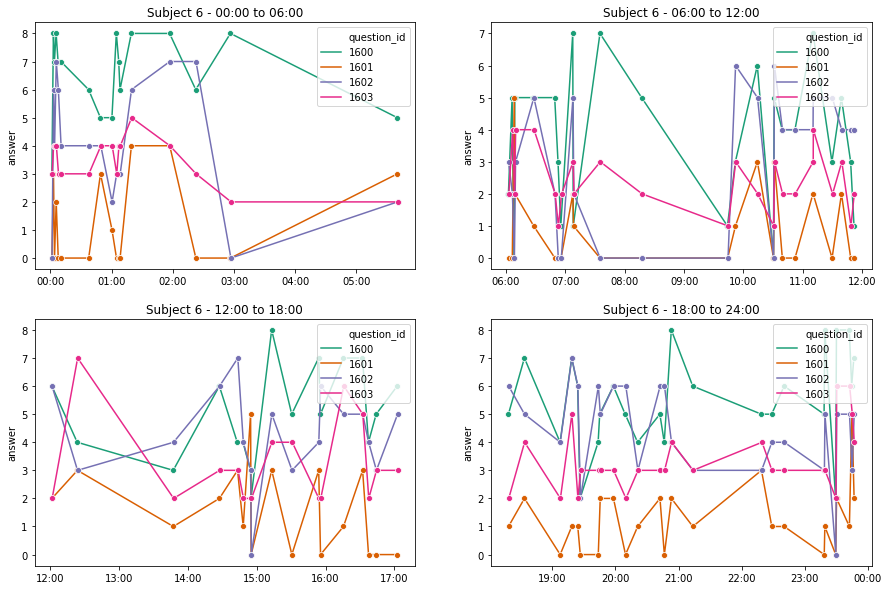

In [8]:
plt.figure(figsize = (15,10))
#plt.subplot(2, 2, 1)
x = df_16_61['timestamp'].apply(lambda x: x.replace(year=1967, month=6, day=25)).tolist()
ax = plt.subplot(2, 2, 1)
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.title('Subject 6 - 00:00 to 06:00')
sns.lineplot(x = x, y="answer", hue = "question_id", data=df_16_61, 
             palette=sns.color_palette('Dark2', n_colors=4), 
             marker = 'o')
plt.legend(loc='upper right')

#plt.subplot(2, 2, 2)
x = df_16_62['timestamp'].apply(lambda x: x.replace(year=1967, month=6, day=25)).tolist()
ax = plt.subplot(2, 2, 2)
#ax.plot(x, df_16_61['answer'])
ax.xaxis.set_major_locator(mdates.HourLocator())
#ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.title('Subject 6 - 06:00 to 12:00')
sns.lineplot(x = x, y="answer", hue = "question_id", data=df_16_62, 
             palette=sns.color_palette('Dark2', n_colors=4), 
             marker = 'o')
plt.legend(loc='upper right')

#plt.subplot(2, 2, 3)
x = df_16_63['timestamp'].apply(lambda x: x.replace(year=1967, month=6, day=25)).tolist()
ax = plt.subplot(2, 2, 3)
#ax.plot(x, df_16_61['answer'])
ax.xaxis.set_major_locator(mdates.HourLocator())
#ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.title('Subject 6 - 12:00 to 18:00')
sns.lineplot(x = x, y="answer", hue = "question_id", data=df_16_63, 
             palette=sns.color_palette('Dark2', n_colors=4), 
             marker = 'o')
plt.legend(loc='upper right')

#plt.subplot(2, 2, 4)
x = df_16_64['timestamp'].apply(lambda x: x.replace(year=1967, month=6, day=25)).tolist()
ax = plt.subplot(2, 2, 4)
#ax.plot(x, df_16_61['answer'])
ax.xaxis.set_major_locator(mdates.HourLocator())
#ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.title('Subject 6 - 18:00 to 24:00')
sns.lineplot(x = x, y="answer", hue = "question_id", data=df_16_64, 
             palette=sns.color_palette('Dark2', n_colors=4), 
             marker = 'o')
plt.legend(loc='upper right')
plt.show()

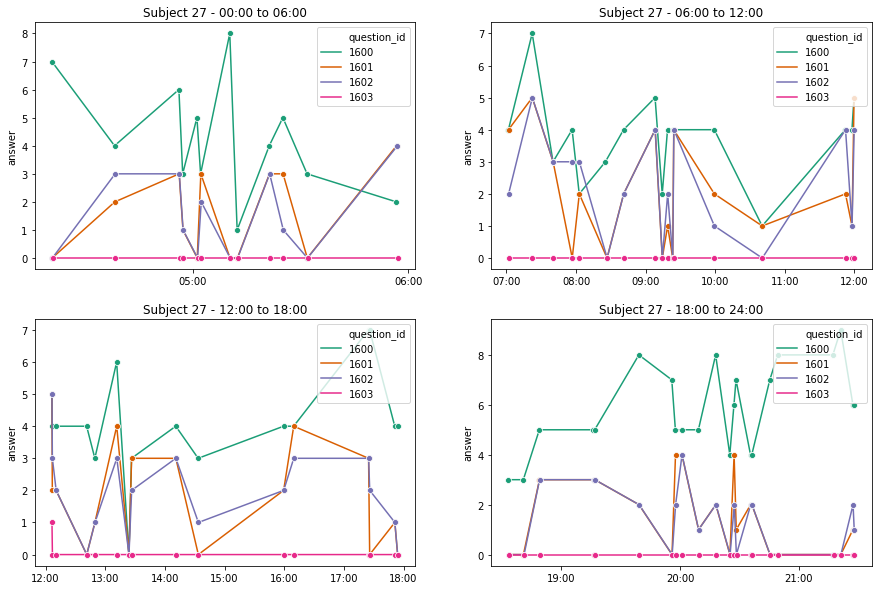

In [9]:
plt.figure(figsize = (15,10))
#plt.subplot(2, 2, 1)
x = df_16_271['timestamp'].apply(lambda x: x.replace(year=1967, month=6, day=25)).tolist()
ax = plt.subplot(2, 2, 1)
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.title('Subject 27 - 00:00 to 06:00')
sns.lineplot(x = x, y="answer", hue = "question_id", data=df_16_271, 
             palette=sns.color_palette('Dark2', n_colors=4), 
             marker = 'o')
plt.legend(loc='upper right')

#plt.subplot(2, 2, 2)
x = df_16_272['timestamp'].apply(lambda x: x.replace(year=1967, month=6, day=25)).tolist()
ax = plt.subplot(2, 2, 2)
#ax.plot(x, df_16_61['answer'])
ax.xaxis.set_major_locator(mdates.HourLocator())
#ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.title('Subject 27 - 06:00 to 12:00')
sns.lineplot(x = x, y="answer", hue = "question_id", data=df_16_272, 
             palette=sns.color_palette('Dark2', n_colors=4), 
             marker = 'o')
plt.legend(loc='upper right')

#plt.subplot(2, 2, 3)
x = df_16_273['timestamp'].apply(lambda x: x.replace(year=1967, month=6, day=25)).tolist()
ax = plt.subplot(2, 2, 3)
#ax.plot(x, df_16_61['answer'])
ax.xaxis.set_major_locator(mdates.HourLocator())
#ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.title('Subject 27 - 12:00 to 18:00')
sns.lineplot(x = x, y="answer", hue = "question_id", data=df_16_273, 
             palette=sns.color_palette('Dark2', n_colors=4), 
             marker = 'o')
plt.legend(loc='upper right')

#plt.subplot(2, 2, 4)
x = df_16_274['timestamp'].apply(lambda x: x.replace(year=1967, month=6, day=25)).tolist()
ax = plt.subplot(2, 2, 4)
#ax.plot(x, df_16_61['answer'])
ax.xaxis.set_major_locator(mdates.HourLocator())
#ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.title('Subject 27 - 18:00 to 24:00')
sns.lineplot(x = x, y="answer", hue = "question_id", data=df_16_274, 
             palette=sns.color_palette('Dark2', n_colors=4), 
             marker = 'o')
plt.legend(loc='upper right')

plt.show()